# Bivariate Boxplots 
**Use Case:** \
helps find correlation between two values by binning \
boxplots help in accounting for outliers 

**Code Logic:** \
First parameter is the df you want to visualize \
Second parameter is the amount of bins you want \
(categorical features will based on amount of categories)\
Third parameter is the feature you want to compare to \
Fourth parameter is the type of boxplots you want; `iqr` or `zscore`

**Actionable Next Steps:** \
Removing Outliers \
Flagging feature engineering

**Note:** \
Generating boxplots create warnings, this is probably due to pd.cut.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_box(ax, df, x, y, xlabel, ylabel, title, color, title_position, order=None):
    sns.boxplot(data = df, y = y, x = x, order = order,
                linewidth = 1.2, color = color,
                flierprops = dict(marker = 'o', markeredgecolor = 'black', markersize = 6.5, linestyle = 'none', markerfacecolor = color, alpha = 0.9),
                ax=ax)

    ax.set_xlabel(xlabel, fontweight = 'bold', fontsize = 16)
    ax.set_ylabel(ylabel, fontweight = 'bold', fontsize = 16)
    ax.tick_params(labelsize = 14)
    ax.text(x = title_position, y = 1.07, s = title, fontsize = 22.5, weight = 'bold', ha = 'center', va = 'bottom', transform = ax.transAxes)

from scipy import stats

def plot_boxplots(dataframe, bins, x_col, method):
    num_cols = dataframe.select_dtypes(include=[np.number]).columns.tolist()
    cat_cols = dataframe.select_dtypes(include=['object']).columns.tolist()
    all_cols = num_cols + cat_cols
    n = len(all_cols)
    ncols = 2
    nrows = n // ncols if n % ncols == 0 else n // ncols + 1

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 2.5 * nrows))

    for ax, col in zip(axes.flatten(), all_cols):
        if col in num_cols:
            if method == 'iqr':
                Q1 = dataframe[col].quantile(0.25)
                Q3 = dataframe[col].quantile(0.75)
                IQR = Q3 - Q1
                dataframe = dataframe[~((dataframe[col] < (Q1 - 1.5 * IQR)) |(dataframe[col] > (Q3 + 1.5 * IQR)))]
            elif method == 'zscore':
                dataframe = dataframe[(np.abs(stats.zscore(dataframe[col])) < 3)]
            dataframe['binned'] = pd.cut(dataframe[col], bins=bins)
        else:
            dataframe['binned'] = pd.Categorical(dataframe[col])
        plot_box(ax, dataframe, x = x_col, y = "binned", xlabel = x_col, ylabel = "Bins", title = col, color = "mediumseagreen", title_position = 0.2)
        dataframe = dataframe.drop(columns=['binned'])

    # Remove any unused subplots
    for ax in axes.flatten()[n:]:
        fig.delaxes(ax)

    plt.tight_layout()
    plt.show()

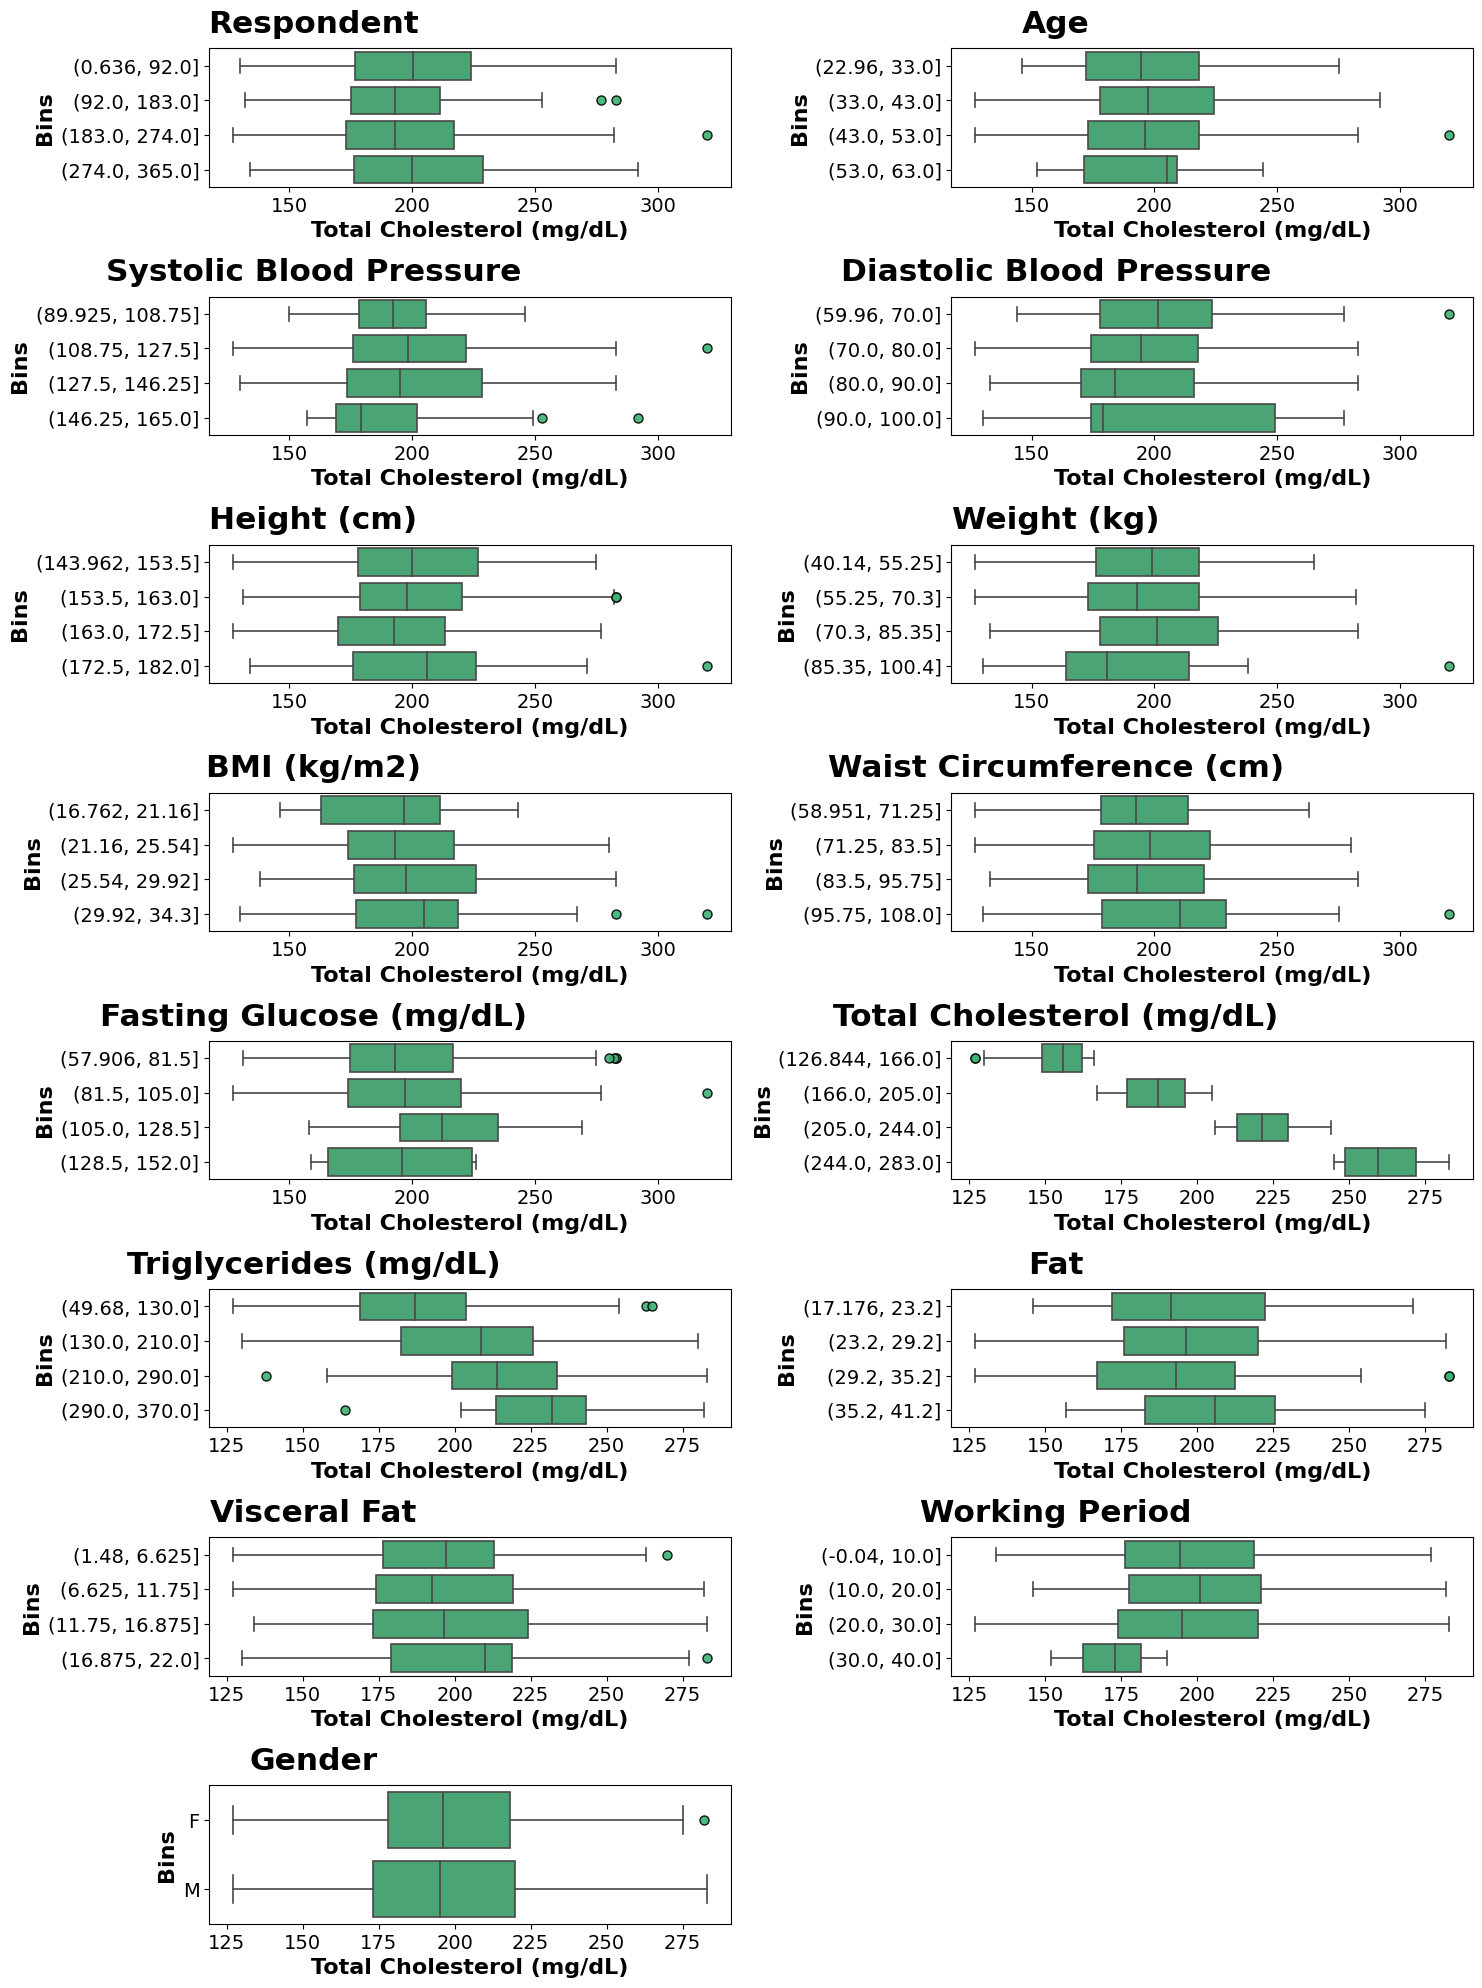

In [9]:
import warnings
warnings.filterwarnings('ignore')
plot_boxplots(df,4, "Total Cholesterol (mg/dL)","zscore")

# Parallel Coordinates Plot
**Use Case:** \
Helps finding patterns throghout all features \
Because the plot is interactable, it is very \
easy to isolate and analyze rows quickly

**Code Logic:** \
First parameter is the dataframe you want to plot \
Second parameter is the feature you want the hues to be based on \
Third parameter is the names of the features you want to plot \
Fourth parameter is the color palette you want

**Actionable Next Steps:** \
Flagging feature engineering \
Removing irrelevant features

**Note:** \
[Full Documentation](https://plotly.com/python/parallel-coordinates-plot/)

In [10]:
import plotly.express as px
columns = ['Total Cholesterol (mg/dL)','Age', 'Systolic Blood Pressure',
              'Diastolic Blood Pressure', 'Height (cm)', 'Weight (kg)']
fig = px.parallel_coordinates(df,color="Total Cholesterol (mg/dL)",dimensions=columns,color_continuous_scale=px.colors.diverging.Portland,)
fig.show(renderer="notebook")

# Pair Plot
**Use Case:** \
Good for finding the shape of relationships \
Can also be used for finding outliers 

**Code Logic:** \
First parameter is the dataframe you want to plot \
Second parameter is the name of the feature that will determine the hue \
Third parameter is the color palette you want

**Actionable Next Steps:** \
Removing outliers \
Feature Engineering \
Combining high correlation features

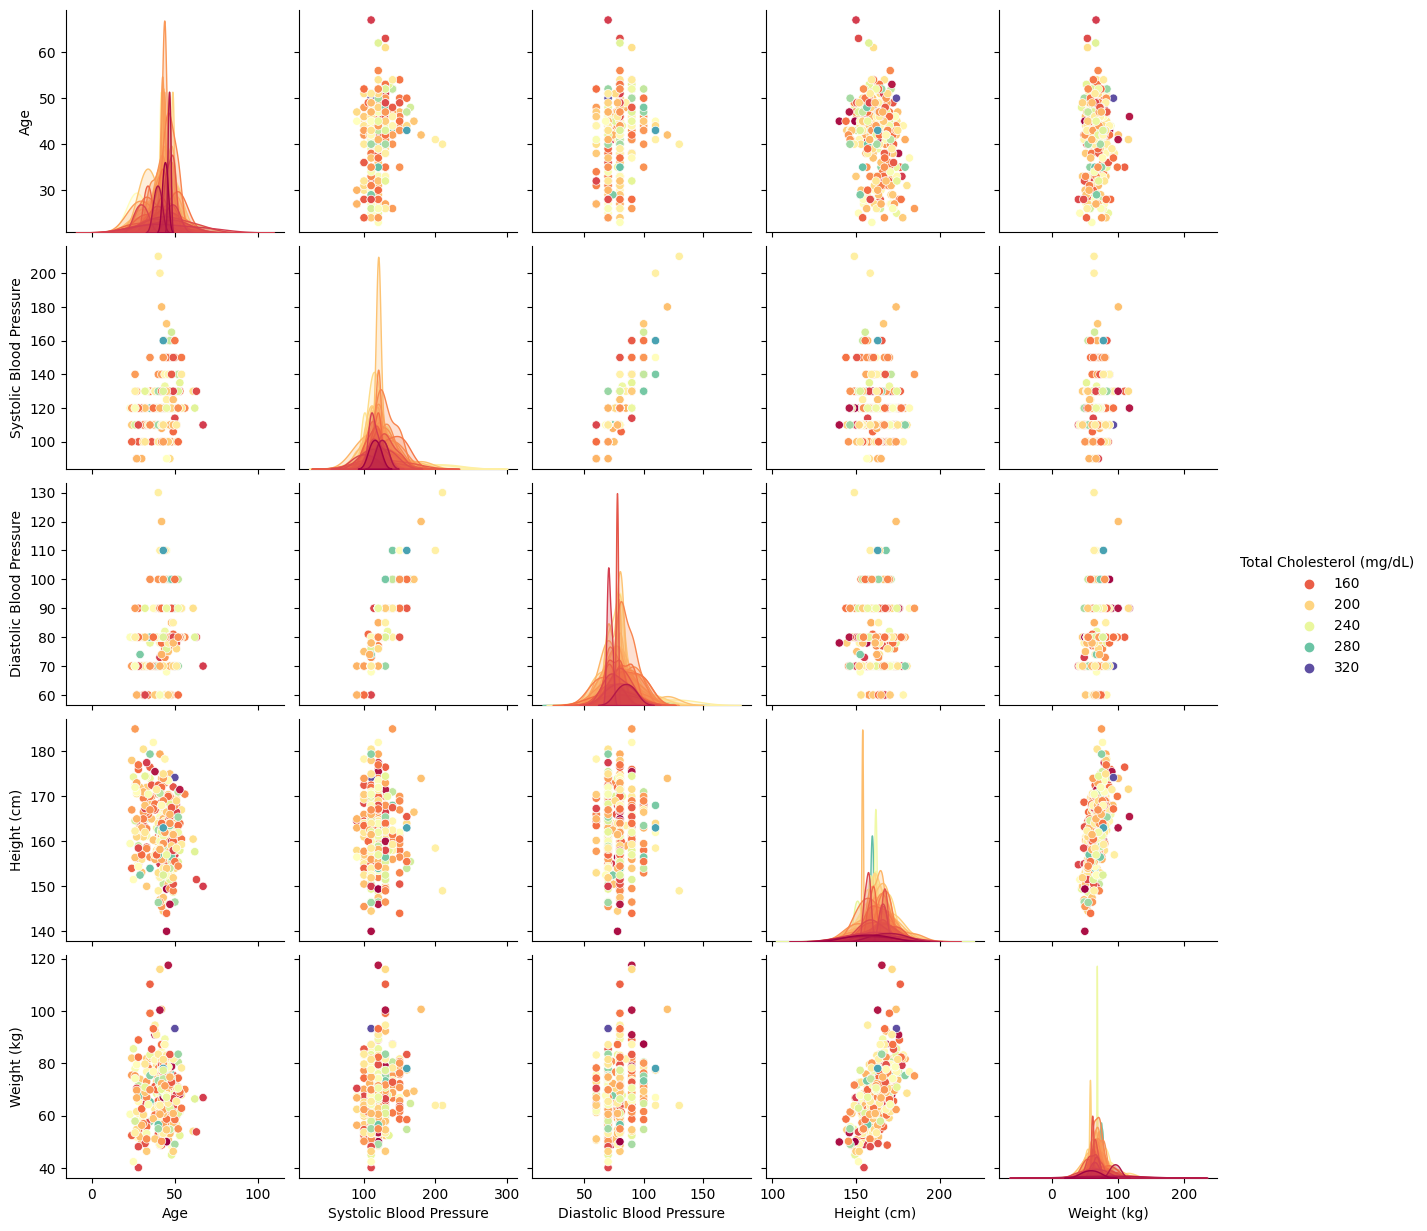

In [11]:
import seaborn as sns
sns.pairplot(df[columns], hue='Total Cholesterol (mg/dL)',palette="Spectral")

# Correlation Heatmap
**Use Case:** \
Very straightforward way for finding feature relationships \

**Code Logic:** \
First parameter is the dataframe you want to plot \
Second parameter is the correlation method you want to use \
(Pearson's or Spearman's)

**Actionable Next Steps:** \
Feature Engineering \
Combining high correlation features

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

def create_correlation_heatmap(df, method='pearson'):
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    cmap = 'coolwarm'
    
    if method == 'pearson':
        corr = numerical_df.corr()
        cmap = 'coolwarm'
    elif method == 'spearman':
        corr = numerical_df.corr(method='spearman')
        cmap = 'viridis'
    else:
        raise ValueError("Invalid method. Expected one of: 'pearson', 'spearman'")
    
    num_cols = corr.shape[1]
    fig_width = 1.2 * num_cols
    fig_height = 1.2 * num_cols
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))

    annot_font_size = max(5, min(15, 300 / num_cols))
    tick_label_font_size = max(5, min(15, 250 / num_cols))
    
    sns.heatmap(
        corr, 
        annot=True, 
        cmap=cmap, 
        fmt=".2f", 
        ax=ax, 
        annot_kws={"size": annot_font_size},
        cbar_kws={"shrink": .8},
    )

    ax.tick_params(axis='both', which='major', labelsize=tick_label_font_size)
    plt.show()

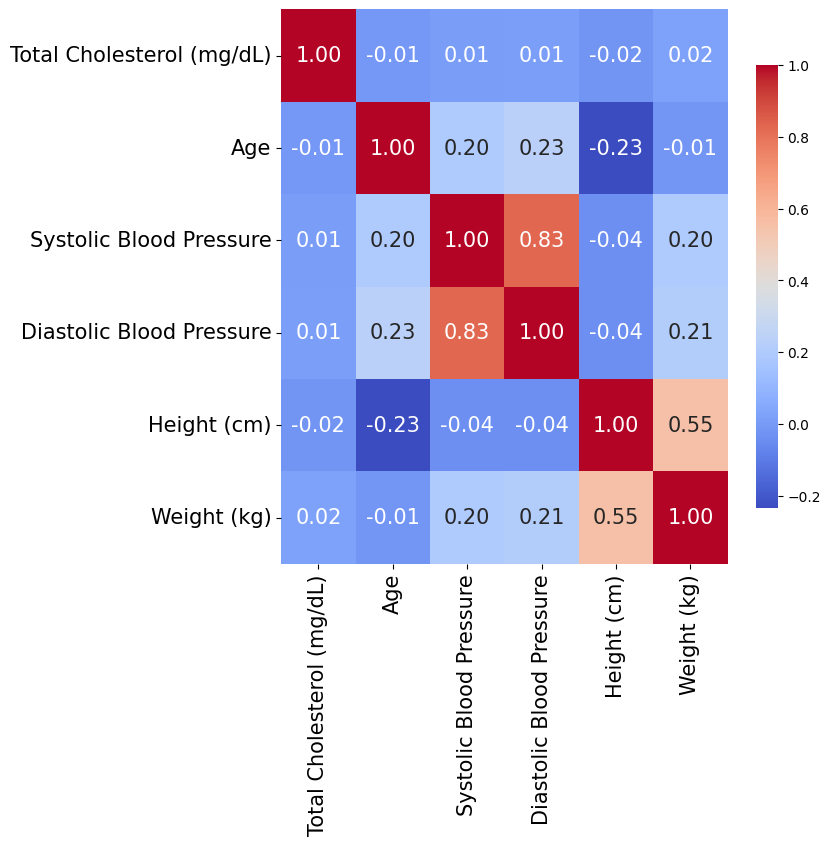

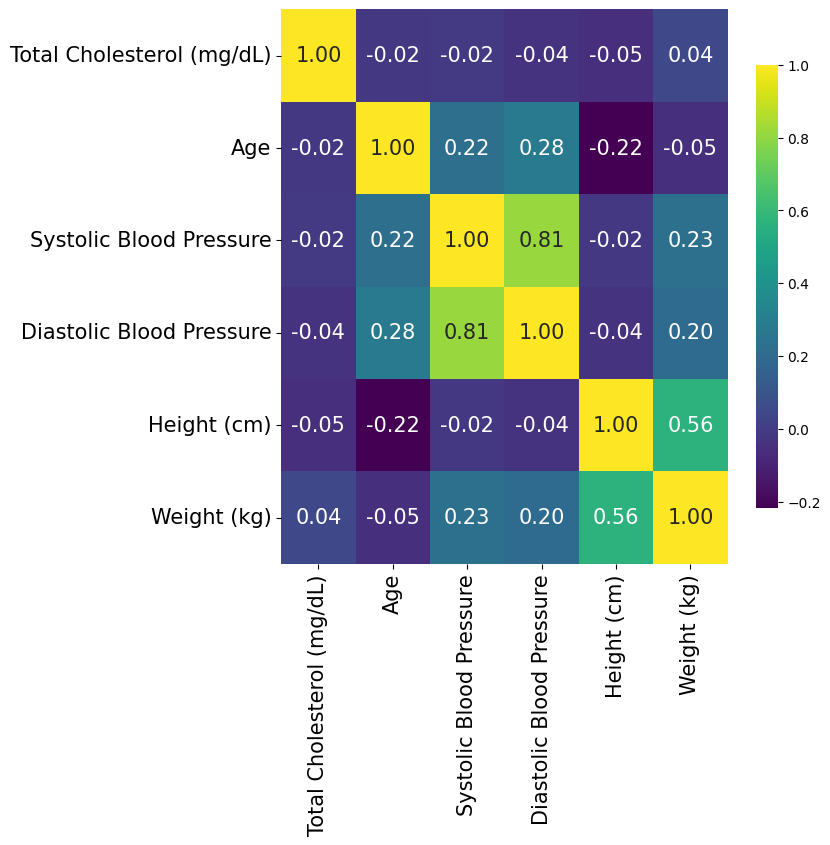

In [25]:
create_correlation_heatmap(df[columns],'pearson')
create_correlation_heatmap(df[columns],'spearman')

# TODO:
- p-values
- null plots